In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed.csv')
df.drop(['Unnamed: 0','eur_sqm','Adress','Informations','URL'],axis=1,inplace=True)
X = df.drop('Rent',axis=1)
y = df['Rent']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,Space,Rooms,lat,long,Borough
1438,50.00,2.0,52.506654,13.407663,Mitte
1362,81.82,3.0,52.833868,13.801858,Brandenburg
725,73.00,2.0,52.554569,13.340316,Mitte
1165,76.00,2.0,52.559698,13.724210,Brandenburg
446,71.09,2.0,52.526493,13.366541,Mitte


## Label Encoding

In [4]:
X_train_label = X_train.copy()
X_test_label = X_test.copy()
label_encoder = LabelEncoder()
X_train_label['Borough'] = label_encoder.fit_transform(X_train['Borough'])
X_test_label['Borough'] = label_encoder.transform(X_test['Borough'])

## One Hot Encoding

In [5]:
onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_onehot = X_train.copy()
X_test_onehot = X_test.copy()
train_col_onehot = pd.DataFrame(onehot.fit_transform(X_train[['Borough']]),
                                columns=onehot.get_feature_names(['Borough']))
test_col_onehot = pd.DataFrame(onehot.transform(X_test[['Borough']]),
                              columns=onehot.get_feature_names(['Borough']))

#onhe hot encoding remove index
train_col_onehot.index=X_train.index
test_col_onehot.index=X_test.index

#remove column Borough and add new columns
X_train_onehot.drop('Borough',axis=1,inplace=True)
X_test_onehot.drop('Borough',axis=1,inplace=True)

X_train_onehot = pd.concat([X_train_onehot,train_col_onehot],axis=1)
X_test_onehot = pd.concat([X_test_onehot,test_col_onehot],axis=1)

## Random Forrest
### Label

In [6]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train_label,y_train)
y_hat = model.predict(X_test_label)

In [7]:
mse = mean_squared_error(y_test,y_hat)
mae = mean_absolute_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
print('MSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2))

MSE: 172814.76840657578
MAE: 230.63923446060227
R2: 0.7893964833524939


### One Hot

In [8]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train_onehot,y_train)
y_hat = model.predict(X_test_onehot)

In [9]:
mse = mean_squared_error(y_test,y_hat)
mae = mean_absolute_error(y_test,y_hat)
r2 = r2_score(y_test,y_hat)
print('MSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2))

MSE: 181514.28844575418
MAE: 231.54529160088507
R2: 0.7787946723482053


## XGBoost

In [10]:
def find_parameters(n_estimators,learning_rate):
    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    
    model.fit(X_train_label,y_train)
    yhat_label = model.predict(X_test_label)
    r2_label = r2_score(y_test,yhat_label)
    
    model.fit(X_train_onehot,y_train)
    yhat_onehot = model.predict(X_test_onehot)
    r2_onehot = r2_score(y_test,yhat_onehot)
    
    return r2_label,r2_onehot

In [11]:
r2_scores = {'label':[{}],'onehot':[{}]}
r2_scores['label'] = {}
r2_scores['onehot'] = {}
for n_estimators in range(100,1100,100):
    r2_scores['label'][n_estimators] = {}
    r2_scores['onehot'][n_estimators] = {}
    for leaning_rate in np.arange(0.01,0.11,0.01):
        r2_label,r2_onehot = find_parameters(n_estimators,leaning_rate)
        r2_scores['label'][n_estimators][leaning_rate] = r2_label
        r2_scores['onehot'][n_estimators][leaning_rate] = r2_onehot

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

In [12]:
max_r2_label = [0,0,0]#n_estimator, learning rate, r^2
max_r2_onehot = [0,0,0]
for i in r2_scores['label'].keys():
    for j in r2_scores['label'][i].keys():
        r2_label = r2_scores['label'][i][j]
        r2_onehot = r2_scores['onehot'][i][j]
        if r2_label>max_r2_label[2]:
            max_r2_label[0],max_r2_label[1],max_r2_label[2] = i,j,r2_label
        if r2_onehot>max_r2_onehot[2]:
            max_r2_onehot[0],max_r2_onehot[1],max_r2_onehot[2] = i,j,r2_onehot
print('label',max_r2_label)
print('onehot',max_r2_onehot)

label [100, 0.08, 0.7925830341991842]
onehot [200, 0.06999999999999999, 0.8025520476800105]


In [13]:
model = XGBRegressor(n_estimators=200, learning_rate=0.07)
model.fit(X_train_onehot,y_train)
yhat = model.predict(X_test_onehot)
r2_onehot = r2_score(y_test,yhat)
mse = mean_squared_error(y_test,yhat)
mae = mean_absolute_error(y_test,yhat)
r2 = r2_score(y_test,yhat)
print('MSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2))

MSE: 162019.71693398908
MAE: 228.45667275489959
R2: 0.8025520476800105


C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Try with early_stopping_rounds=5

In [14]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(X_train_label,y_train,early_stopping_rounds=5,eval_set=[(X_test_label, y_test)],verbose=False)
yhat_label = model.predict(X_test_label)
r2_label = r2_score(y_test,yhat_label)

model.fit(X_train_onehot,y_train,early_stopping_rounds=5,eval_set=[(X_test_onehot, y_test)],verbose=False)
yhat_onehot = model.predict(X_test_onehot)
r2_onehot = r2_score(y_test,yhat_onehot)

print('label: '+str(r2_label)+'\nonehot: '+str(r2_onehot))

C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


label: 0.7908033268143929
onehot: 0.7967954220887729


C:\Users\David\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Plots and more

In [15]:
df.describe()

,Rent,Space,Rooms,lat,long
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,1155.510798,75.932904,2.417221,52.242849,13.124475
std,947.432325,41.776838,1.071311,1.076802,1.277693
min,157.640000,9.100000,1.000000,47.843455,7.975606
25%,585.500000,51.000000,2.000000,52.436533,13.300326
50%,900.000000,68.000000,2.000000,52.508012,13.396914
75%,1405.830000,92.000000,3.000000,52.539834,13.505301
max,12000.000000,462.000000,8.000000,53.267988,14.719608


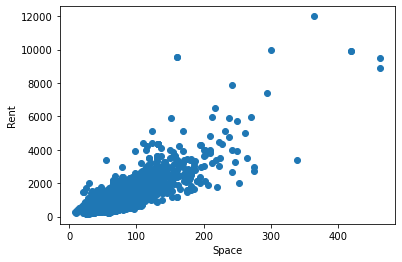

In [16]:
plt.scatter(df['Space'],df['Rent'])
plt.xlabel('Space')
plt.ylabel('Rent')
plt.show()

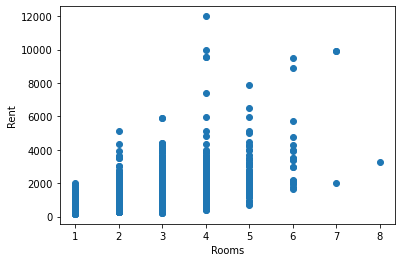

In [17]:
plt.scatter(df['Rooms'],df['Rent'])
plt.xlabel('Rooms')
plt.ylabel('Rent')
plt.show()

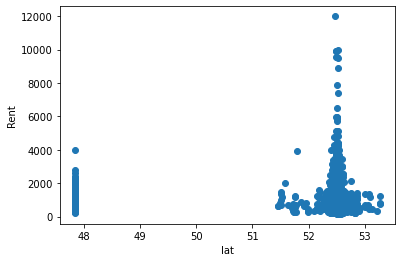

In [18]:
plt.scatter(df['lat'],df['Rent'])
plt.xlabel('lat')
plt.ylabel('Rent')
plt.show()

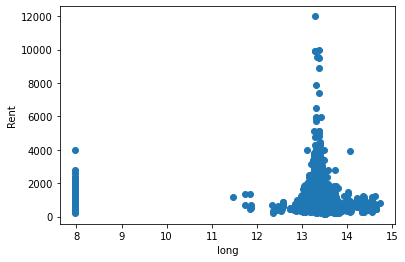

In [19]:
plt.scatter(df['long'],df['Rent'])
plt.xlabel('long')
plt.ylabel('Rent')
plt.show()

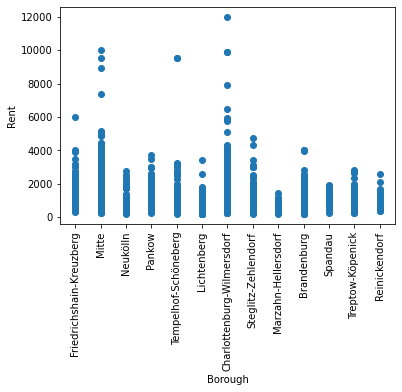

In [20]:
plt.scatter(df['Borough'],df['Rent'])
plt.xlabel('Borough')
plt.ylabel('Rent')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Mutual Information')

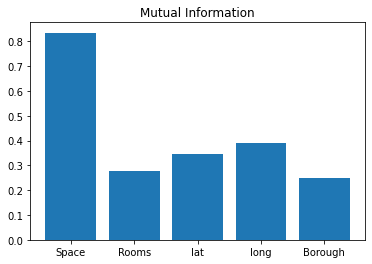

In [21]:
X_label = X.copy()
label_encoder = LabelEncoder()
X_label['Borough'] = label_encoder.fit_transform(X_label['Borough'])
mi_scores_label=mutual_info_regression(X_label, y, discrete_features=[False,True,False,False,True])
mi_scores_label = pd.Series(mi_scores_label, name="MI Scores", index=X_label.columns)
mi_scores_label.sort_values(ascending=False)
plt.bar(mi_scores_label.index,mi_scores_label)
plt.title('Mutual Information')

## Regression

Coefficients:  18.00812395213062
Intercept:  -210.3911117093112

MSE: 323035.86641088634
MAE: 403.4635984077551
R2: 0.6063271090966671


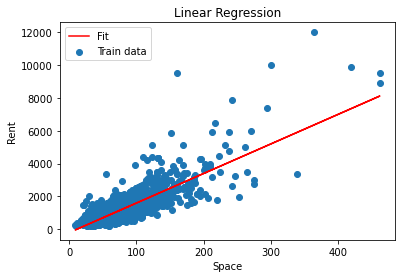

In [22]:
X_train_reg = np.asanyarray(X_train[['Space']])

model = linear_model.LinearRegression()
model.fit(X_train_reg,y_train)

print ('Coefficients: ', model.coef_[0])
print ('Intercept: ',model.intercept_)

plt.scatter(X_train_reg,y_train,label='Train data')
plt.plot(X_train_reg,X_train_reg*model.coef_+model.intercept_,color='red',label='Fit')
plt.title('Linear Regression')
plt.xlabel('Space')
plt.ylabel('Rent')
plt.legend()

X_test_reg = np.asanyarray(X_test[['Space']])

yhat = model.predict(X_test_reg)
mse = mean_squared_error(y_test,yhat)
mae = mean_absolute_error(y_test,yhat)
r2 = r2_score(y_test,yhat)
print('\nMSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2))

## SVM

In [23]:
def svm_tests(X_train,X_test,y_train,y_test,features,kernel):
    print('features: '+str(features)+'\nkernel: '+str(kernel))
    X_train_svm = np.asanyarray(X_train[features])
    X_test_svm = np.asanyarray(X_test[features])
    model = svm.SVR(kernel=kernel)
    model.fit(X_train_svm,y_train)
    yhat = model.predict(X_test_svm)

    mse = mean_squared_error(y_test,yhat)
    mae = mean_absolute_error(y_test,yhat)
    r2 = r2_score(y_test,yhat)
    print('\nMSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2)+'\n----------------------------------------------')
    return r2

### Label

In [24]:
features_list = list(X_train_label.columns)
t = 0
numberofelements = 1
r2_scores = []
while True:
    features = []
    if (t+1)%6==0:
        numberofelements+=1
        t=0
        
    for i in range(numberofelements):
        features.append(feature_list[t-i])
            
    t+=1
    
    #label
    test1 = svm_tests(X_train_label,X_test_label,y_train,y_test,features,'rbf')
    test2 = svm_tests(X_train_label,X_test_label,y_train,y_test,features,'linear')
    test3 = svm_tests(X_train_label,X_test_label,y_train,y_test,features,'poly')
    test4 = svm_tests(X_train_label,X_test_label,y_train,y_test,features,'sigmoid')
    
    r2_scores.append((test1,'rbf',features))
    r2_scores.append((test2,'linear',features))
    r2_scores.append((test3,'poly',features))
    r2_scores.append((test4,'sigmoid',features))
    
    if numberofelements==6:
        break
    
    

NameError: name 'feature_list' is not defined

In [ ]:
r2_scores_values = [r2[0] for r2 in r2_scores]
r2_scores_values.index(max(r2_scores_values))
r2_scores[50]

### One Hot

In [ ]:
features_list = list(X_train_onehot.columns)
svm_tests(X_train_onehot,X_test_onehot,y_train,y_test,features_list,'rbf')
svm_tests(X_train_onehot,X_test_onehot,y_train,y_test,features_list,'linear')
svm_tests(X_train_onehot,X_test_onehot,y_train,y_test,features_list,'poly')
svm_tests(X_train_onehot,X_test_onehot,y_train,y_test,features_list,'sigmoid')

## Tests

In [ ]:
model = XGBRegressor(n_estimators=200, learning_rate=0.07)
model.fit(X_train_onehot,y_train)
test_sarah = pd.DataFrame({'Space':36,'Rooms':1,'lat':52.43967,'long':13.60136,'Borough_Brandenburg':0,'Borough_Charlottenburg-Wilmersdorf':0,'Borough_Friedrichshain-Kreuzberg':0,'Borough_Lichtenberg':0,'Borough_Marzahn-Hellersdorf':0,'Borough_Mitte':0,'Borough_Neukölln':0,'Borough_Pankow':0,'Borough_Reinickendorf':0,'Borough_Spandau':0,'Borough_Steglitz-Zehlendorf':0,'Borough_Tempelhof-Schöneberg':0,'Borough_Treptow-Köpenick':1},index=[0])
test_uschi = pd.DataFrame({'Space':57,'Rooms':2,'lat':52.43863,'long':13.50036,'Borough_Brandenburg':0,'Borough_Charlottenburg-Wilmersdorf':0,'Borough_Friedrichshain-Kreuzberg':0,'Borough_Lichtenberg':0,'Borough_Marzahn-Hellersdorf':0,'Borough_Mitte':0,'Borough_Neukölln':0,'Borough_Pankow':0,'Borough_Reinickendorf':0,'Borough_Spandau':0,'Borough_Steglitz-Zehlendorf':0,'Borough_Tempelhof-Schöneberg':0,'Borough_Treptow-Köpenick':1},index=[0])
yhat = model.predict(test_uschi)
yhat

In [ ]:
test_sarah

In [ ]:
X_train_label

In [ ]:
X_train_svm = np.asanyarray(X_train_label)
X_test_svm = np.asanyarray(X_test_label)
model = svm.SVR()
model.fit(X_train_svm,y_train)
yhat = model.predict(X_test_svm)

mse = mean_squared_error(y_test,yhat)
mae = mean_absolute_error(y_test,yhat)
r2 = r2_score(y_test,yhat)
print('\nMSE: '+str(mse)+'\nMAE: '+str(mae)+'\nR2: '+str(r2))

In [1]:
from tensorflow import keras